## Feature Engineering


*   The fourth project is the development of a notebook (code + explanation) that successfully engineers 12 unique types of features, **three** for each type of feature engineering: **transforming**, **interacting**, **mapping**, and **extracting**.
* The second part of the assignment is the development of a **deep learning classification** model to predict the direction of the S&P500 for the dates **2018-01-01—2018-07-12** (test set).
* The feature engineering section is unrelated to the model section, you can develop any features, not just features that would work for deep learning models (later on you can decide which features to use in your model).
*  You also have to uncomment all the example features and make them run successfully  → **every** feature example has some error/s that you have to fix. Please also describe the error you fixed!
*   Note that we *won't* be attempting to measure the quality of every feature (i.e., how much it improves the model), that is slightly too advanced for this course.


In [1]:
!pip install ta pandas numpy seaborn sklearn matplotlib tensorflow umap-learn
import ta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

     ---------------------------------------- 0.0/88.2 kB ? eta -:--:--
     ------------- -------------------------- 30.7/88.2 kB ? eta -:--:--
     ------------- -------------------------- 30.7/88.2 kB ? eta -:--:--
     ------------- -------------------------- 30.7/88.2 kB ? eta -:--:--
     ------------- -------------------------- 30.7/88.2 kB ? eta -:--:--
     ------------- -------------------------- 30.7/88.2 kB ? eta -:--:--
     ------------- -------------------------- 30.7/88.2 kB ? eta -:--:--
     ------------- -------------------------- 30.7/88.2 kB ? eta -:--:--
     ------------- -------------------------- 30.7/88.2 kB ? eta -:--:--
     ------------- -------------------------- 30.7/88.2 kB ? eta -:--:--
     ------------- -------------------------- 30.7/88.2 kB ? eta -:--:--
     ------------- -------------------------- 30.7/88.2 kB ? eta -:--:--
     ------------- -------------------------- 30.7/88.2 kB ? eta -:--:--
     ------------- -------------------------- 30.7/8


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Python310\python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'ta'

Preparing the Data

In [390]:
# preparing our data
raw_prices = pd.read_csv("https://open-data.s3.filebase.com/assetalloc.csv", sep=';', parse_dates=True, index_col='Dates', dayfirst=True)
df = raw_prices.sort_values(by='Dates')
df["target"] = df["SP500"].pct_change().shift(-1)
df["target"] = np.where(df["target"]>0,1,0)
df.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,target
Dates,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,101.080,101.936,154.38,117.50,1636.57,133.584,286.67,0
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,101.905,154.94,117.69,1642.94,135.052,287.03,1
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,101.718,155.69,118.62,1659.11,137.134,285.63,0
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,101.468,155.58,118.89,1656.86,137.037,284.69,1
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,102.092,156.84,118.28,1662.76,136.914,284.21,0


### Train Test Split

In [391]:
from sklearn.model_selection import train_test_split
y = df.pop("target")
X = df.copy()

X_train = X[X.index.astype(str)<'2018-01-01']
y_train = y[X_train.index]
X_test = X[~X.index.isin(X_train.index)]
y_test = y[X_test.index]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### Transforming

1. Refresh your mind on tranformation methods by going back to the material. I am simply providing 1 example here. 
1. Don't repeat my logarithmic return calculation, develop your own transformation (there are 1000s of types of transformations).
1. In the example I provide, there is also an error that you have to fix. For example, one of the errors below is that you should actually use `np.log1p()`, but there is another one, so watch out! 

In [392]:
# Example Transforming (has errors) 

# Name: Logarithmic return of FTSE 
# Description: Developing the logarithmic return feature for use within linear models that make normality assumptions. 

# This is incorrect. This would not be the log return, this would just be the log of the prices, which is less useful
# df["FTSE_log"] = np.log(df["FTSE"])
# To get the log of the returns you would need to first find the returns and then take the log
df['FTSE_ret'] = (df['FTSE'] - df['FTSE'].shift(1)) / df['FTSE'].shift(1)
df['FTSE_log'] = np.log1p(df["FTSE_ret"])
df = df.dropna(subset=['FTSE_ret', 'FTSE_log'])
df

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,FTSE_ret,FTSE_log
Dates,,,,,,,,,,,,,,,,,,,
1989-02-02,2043.40,878.080,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,101.905,154.94,117.690,1642.94,135.052,287.03,0.001814,0.001812
1989-02-03,2069.90,884.090,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,101.718,155.69,118.620,1659.11,137.134,285.63,0.012969,0.012885
1989-02-06,2044.30,885.490,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,101.468,155.58,118.890,1656.86,137.037,284.69,-0.012368,-0.012445
1989-02-07,2072.80,883.820,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,102.092,156.84,118.280,1662.76,136.914,284.21,0.013941,0.013845
1989-02-08,2096.20,891.810,298.65,390.50,98.558,98.658,98.756,97.893,99.812,100.156,101.016,101.655,157.00,118.730,1681.85,137.027,284.38,0.011289,0.011226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-06,7617.70,3448.490,2759.82,1254.84,90.036,149.257,211.743,306.533,122.817,143.926,143.078,164.296,1694.05,255.104,5888.00,1059.968,437.12,0.001904,0.001903
2018-07-09,7687.99,3460.442,2784.17,1261.56,90.022,149.158,211.487,303.672,122.779,143.745,142.721,163.527,1704.60,256.680,5904.19,1075.738,437.79,0.009227,0.009185
2018-07-10,7692.04,3473.311,2793.84,1254.45,90.004,149.059,211.377,303.464,122.702,143.610,142.565,163.354,1695.62,258.043,5921.59,1076.188,438.66,0.000527,0.000527


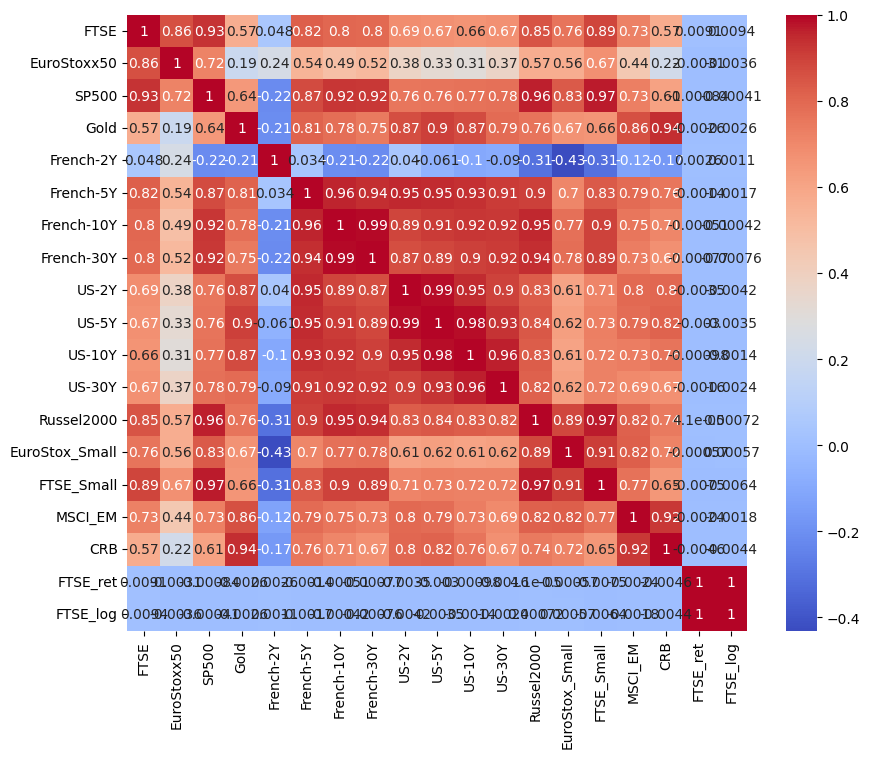

In [393]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()
# Lot of significantly correlated columns

In [394]:
## Transforming 1 (Add code below)
# Min-max normalization 
times = sorted(df.index.values)
last_10pct = sorted(df.index.values)[-int(0.1*len(times))] # Last 10% of series
last_20pct = sorted(df.index.values)[-int(0.2*len(times))] # Last 20% of series

min_return = min(df[(df.index < last_20pct)][['FTSE']].min(axis=0))
max_return = max(df[(df.index < last_20pct)][['FTSE']].max(axis=0))

df['FTSE_min_max'] = (df['FTSE'] - min_return) / (max_return - min_return)
df

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,FTSE_ret,FTSE_log,FTSE_min_max
Dates,,,,,,,,,,,,,,,,,,,,
1989-02-02,2043.40,878.080,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,101.905,154.94,117.690,1642.94,135.052,287.03,0.001814,0.001812,0.010769
1989-02-03,2069.90,884.090,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,101.718,155.69,118.620,1659.11,137.134,285.63,0.012969,0.012885,0.016134
1989-02-06,2044.30,885.490,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,101.468,155.58,118.890,1656.86,137.037,284.69,-0.012368,-0.012445,0.010951
1989-02-07,2072.80,883.820,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,102.092,156.84,118.280,1662.76,136.914,284.21,0.013941,0.013845,0.016721
1989-02-08,2096.20,891.810,298.65,390.50,98.558,98.658,98.756,97.893,99.812,100.156,101.016,101.655,157.00,118.730,1681.85,137.027,284.38,0.011289,0.011226,0.021457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-06,7617.70,3448.490,2759.82,1254.84,90.036,149.257,211.743,306.533,122.817,143.926,143.078,164.296,1694.05,255.104,5888.00,1059.968,437.12,0.001904,0.001903,1.139170
2018-07-09,7687.99,3460.442,2784.17,1261.56,90.022,149.158,211.487,303.672,122.779,143.745,142.721,163.527,1704.60,256.680,5904.19,1075.738,437.79,0.009227,0.009185,1.153399
2018-07-10,7692.04,3473.311,2793.84,1254.45,90.004,149.059,211.377,303.464,122.702,143.610,142.565,163.354,1695.62,258.043,5921.59,1076.188,438.66,0.000527,0.000527,1.154219


In [395]:
## Transforming 2 (Add code below)
# MinMaxScaler
prices = df['FTSE'].values.reshape(-1, 1)
scaler = MinMaxScaler()
prices = scaler.fit_transform(prices)
prices

array([[0.00903648],
       [0.01353773],
       [0.00918935],
       ...,
       [0.96850652],
       [0.95150707],
       [0.96159158]])

In [396]:
## Transforming 3 (Add code below)
# Windowing
def partition(data, seq_length):
  X, y = [], []
  for i in range(len(data) - seq_length):
    X.append(data[i:(i + seq_length)])
    y.append(data[i + seq_length])
  return np.array(X), np.array(y)

window_size = 60
split_X, split_y = partition(prices, window_size)
split_X.shape, split_y.shape

((7621, 60, 1), (7621, 1))

### Interacting

There are millions of possible interaction methods, be creative and come up with your own. For this assignment there is no 'right' feature engineering method, you simply develop one, and give it a name and a discreption.

In [397]:
# Example Interacting (has errors) 

# Name: Ratio of Gold return to 10Y treasury
# Desciption: Both gold and treasuries are safe-haven assets and descrepency in their ratio could be a sign of some marco-economic event.

# The error is that gold returns were not being calculated, you were using the price as the return
def gold_to_yield(df):
  teny_returns = (df['US-10Y'] - df['US-10Y'].shift(1)) / df['US-10Y'].shift(1)
  gold_returns = (df['Gold'] - df['Gold'].shift(1)) / df['Gold'].shift(1)
  df["gold_r__div__teny_r"] = gold_returns/teny_returns
  return df

X_train = gold_to_yield(X_train); X_test = gold_to_yield(X_test)

<ipython-input-397-91882eac6164>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gold_r__div__teny_r"] = gold_returns/teny_returns
<ipython-input-397-91882eac6164>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gold_r__div__teny_r"] = gold_returns/teny_returns


In [398]:
## Interacting 1 (Add code below)
# Get market composite returns

stock_indices = ['FTSE', 'EuroStoxx50', 'SP500', 'Russel2000', 'EuroStox_Small', 'FTSE_Small', 'MSCI_EM']
df["Composite_Market_ret"] = df[stock_indices].pct_change().mean(axis=1)
df[[*stock_indices, "Composite_Market_ret"]]

,FTSE,EuroStoxx50,SP500,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,Composite_Market_ret
Dates,,,,,,,,
1989-02-02,2043.40,878.080,296.84,154.94,117.690,1642.94,135.052,NaN
1989-02-03,2069.90,884.090,296.97,155.69,118.620,1659.11,137.134,0.008322
1989-02-06,2044.30,885.490,296.04,155.58,118.890,1656.86,137.037,-0.002059
1989-02-07,2072.80,883.820,299.63,156.84,118.280,1662.76,136.914,0.004259
1989-02-08,2096.20,891.810,298.65,157.00,118.730,1681.85,137.027,0.004884
...,...,...,...,...,...,...,...,...
2018-07-06,7617.70,3448.490,2759.82,1694.05,255.104,5888.00,1059.968,0.004724
2018-07-09,7687.99,3460.442,2784.17,1704.60,256.680,5904.19,1075.738,0.007364
2018-07-10,7692.04,3473.311,2793.84,1695.62,258.043,5921.59,1076.188,0.001589


In [399]:
## Interacting 2 (Add code below)

bonds = {'French': ['French-2Y', 'French-5Y', 'French-10Y', 'French-30Y'],
         'US': ['US-2Y', 'US-5Y', 'US-10Y', 'US-30Y']}
# Get bond yield spreads per country and
# Aggregate them into one feature per country  
def get_bond_spreads(df, bonds):
  for country, bond_list in bonds.items():
      country_spreads = []
      for i in range(len(bond_list)):
          for j in range(i+1, len(bond_list)):
              spread_name = f"{country}_{bond_list[i].split('-')[-1]}_{bond_list[j].split('-')[-1]}_spread"
              df[spread_name] = df[bond_list[j]] - df[bond_list[i]]
              country_spreads.append(df[spread_name])

      avg_spread_name = f"{country}_avg_spread"
      df[avg_spread_name] = pd.concat(country_spreads, axis=1).mean(axis=1)

get_bond_spreads(df, bonds)

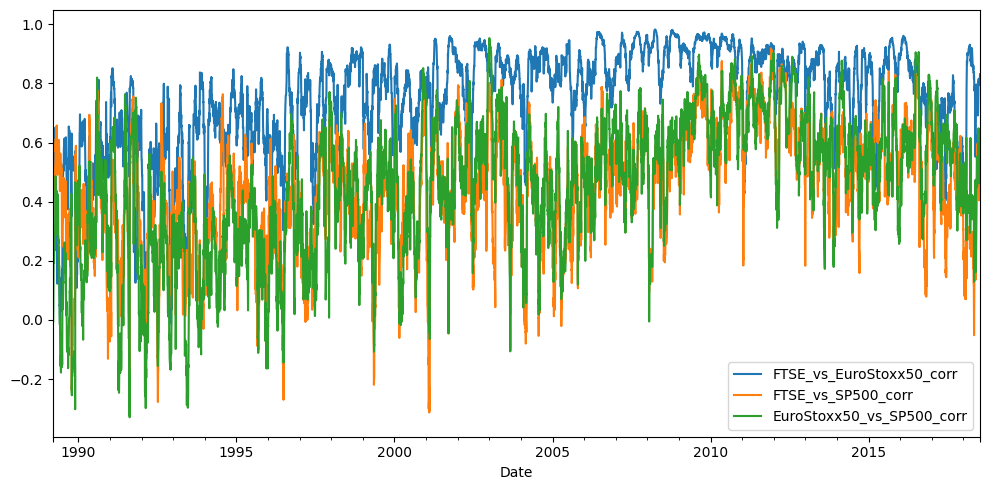

In [400]:
## Interacting 3 (Add code below)
# Rolling correlations
index_pairs = [('FTSE', 'EuroStoxx50'), ('FTSE', 'SP500'), ('EuroStoxx50', 'SP500')]
corrs = []
returns = df[stock_indices].pct_change()
for index1, index2 in index_pairs:
    corr_col_name = f'{index1}_vs_{index2}_corr'
    corrs.append(corr_col_name)
    df[corr_col_name] = returns[index1].rolling(window=30).corr(returns[index2]) 

df_corrs = df[corrs].dropna()

ax = df_corrs.plot(figsize=(10, 5))
ax.set_xlabel('Date')
plt.tight_layout()
plt.show()

### Mapping

This one is slightly harder, you have to identify other  dimensionality reduction methods, there are many more than just PCA. Maybe you can also look at performing the decompositions just on a single asset classes, e.g., US-2Y, US-5Y, US-10Y, US-30Y is a fixed income asset class, but there are a few others in the dataset.

In [401]:
# Example Mapping (has errors) 

# Name: First prinicipal component of all of the assets returns
# Description:For stocks the first component resmbles the return of the market, for multiple asset classes it could resemble a 'universal' asset class


# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# def pca_first(X_train, X_test):
#   sc = StandardScaler()
#   X_train_s = sc.fit_transform(X_train.fillna(0))
#   X_test_s = sc.transform(X_test.fillna(0))

#   pca = PCA(1)
#   X_train["first_prinicipal"] = pca.fit_transform(X_train_s.fillna(0))
#   X_test["first_prinicipal"] = pca.transform(X_test_s.fillna(0))
#   return X_train, X_test
# Data was not clean. Had inf values.
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

def pca_first(X_train, X_test):
    X_train = X_train.replace([np.inf, -np.inf], np.nan)
    X_test = X_test.replace([np.inf, -np.inf], np.nan)

    imputer = SimpleImputer(strategy='mean')
    X_train_filled = imputer.fit_transform(X_train)
    X_test_filled = imputer.transform(X_test)

    sc = StandardScaler()
    X_train_s = sc.fit_transform(X_train_filled)
    X_test_s = sc.transform(X_test_filled)

    pca = PCA(1)
    X_train["first_prinicipal"] = pca.fit_transform(X_train_s)
    X_test["first_prinicipal"] = pca.transform(X_test_s)
    return X_train, X_test

X_train, X_test = pca_first(X_train, X_test)

X_train


,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,gold_r__div__teny_r,first_prinicipal
Dates,,,,,,,,,,,,,,,,,,,
1989-02-01,2039.70,875.470,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,101.080,101.936,154.38,117.500,1636.57,133.584,286.67,NaN,-5.148893
1989-02-02,2043.40,878.080,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,101.905,154.94,117.690,1642.94,135.052,287.03,2.043878,-5.147709
1989-02-03,2069.90,884.090,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,101.718,155.69,118.620,1659.11,137.134,285.63,8.724098,-5.154469
1989-02-06,2044.30,885.490,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,101.468,155.58,118.890,1656.86,137.037,284.69,1.533094,-5.185116
1989-02-07,2072.80,883.820,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,102.092,156.84,118.280,1662.76,136.914,284.21,3.525563,-5.164056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,7592.66,3553.389,2683.34,1274.29,91.846,149.476,209.557,293.433,124.228,147.302,148.144,170.041,1542.93,266.238,5848.24,1141.108,431.77,NaN,7.352006
2017-12-26,7592.66,3553.389,2680.50,1282.51,91.846,149.476,209.557,293.433,124.228,147.418,148.427,170.988,1544.23,266.238,5848.24,1138.632,432.65,3.376768,7.374522
2017-12-27,7620.68,3550.174,2682.62,1286.08,91.793,149.605,209.935,294.529,124.282,147.651,149.136,173.287,1543.94,267.076,5874.46,1144.390,431.77,0.582739,7.447509


In [402]:
## Mapping 1 (Add code below)
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
df_TSNE = tsne.fit_transform(df.dropna())
df_TSNE

array([[-73.83203  , -49.727318 ],
       [-74.43271  , -51.367794 ],
       [-74.644936 , -51.998367 ],
       ...,
       [ 84.30308  ,   7.5006523],
       [ 83.18773  ,   8.020522 ],
       [ 83.7659   ,   7.862735 ]], dtype=float32)

In [403]:
## Mapping 2 (Add code below)
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=4, random_state=101)
fa.fit(df.dropna())
df_fa = fa.transform(df.dropna())
df_fa = pd.DataFrame(df_fa)
df_fa

,0,1,2,3
0,-1.134713,-0.637008,0.857546,-1.278946
1,-1.115383,-0.359042,0.785476,-1.399722
2,-1.131299,-0.469287,0.815600,-1.379721
3,-1.134466,-0.549690,0.860104,-1.329083
4,-1.139622,-0.592940,0.850246,-1.350572
...,...,...,...,...
7646,2.519065,-1.261263,2.099635,0.669018
7647,2.454876,-1.535514,2.026501,0.817213
7648,2.452039,-1.539657,2.034464,0.829455
7649,2.483365,-1.407729,2.078258,0.686957


In [404]:
## Mapping 3 (Add code below)
from sklearn.decomposition import FastICA
ica = FastICA(n_components=3)
df_ica = pd.DataFrame(ica.fit_transform(df.dropna()), columns=['IC1', 'IC2', 'IC3'])
df_ica

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


,IC1,IC2,IC3
0,0.005654,-0.004059,0.025489
1,0.005604,-0.004135,0.025692
2,0.005640,-0.003884,0.025869
3,0.005559,-0.004061,0.025689
4,0.005668,-0.004222,0.025875
...,...,...,...
7646,0.037204,-0.002586,-0.003808
7647,0.037007,-0.002042,-0.004400
7648,0.037276,-0.002440,-0.004308
7649,0.037344,-0.002571,-0.003526


Extracting

In [405]:
# Example Extracting (has errors) 
# Name: Annualized volatility in returns
# Description: We are developing an annualized volatility measure for all asset returns, which is a good measure of market turbulence

# There are 252 trading days not 365
def vola(df):
  volatility = df.pct_change().rolling(window=252).std()*(252**0.5)
  new_names = [(i,i+'_vol') for i in df.columns.values]
  volatility.rename(columns = dict(new_names), inplace=True)
  df = pd.concat((df, volatility), axis=1)
  return df


X_train = vola(X_train); X_test = vola(X_test)
X_train

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,US-5Y_vol,US-10Y_vol,US-30Y_vol,Russel2000_vol,EuroStox_Small_vol,FTSE_Small_vol,MSCI_EM_vol,CRB_vol,gold_r__div__teny_r_vol,first_prinicipal_vol
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-01,2039.70,875.470,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-02-02,2043.40,878.080,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-02-03,2069.90,884.090,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-02-06,2044.30,885.490,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-02-07,2072.80,883.820,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,7592.66,3553.389,2683.34,1274.29,91.846,149.476,209.557,293.433,124.228,147.302,...,0.024931,0.047688,0.104449,0.117539,0.094075,0.053706,0.092594,0.051097,291.038924,0.096538
2017-12-26,7592.66,3553.389,2680.50,1282.51,91.846,149.476,209.557,293.433,124.228,147.418,...,0.024796,0.047532,0.104266,0.117475,0.094070,0.053474,0.092634,0.050445,291.041840,0.096374
2017-12-27,7620.68,3550.174,2682.62,1286.08,91.793,149.605,209.935,294.529,124.282,147.651,...,0.024775,0.047626,0.104879,0.117224,0.093815,0.053356,0.092630,0.050293,291.043013,0.096721


In [406]:
## Extracting 1 (Add code below)
# Moving averages and crossover
df['FTSE_20_SMA'] = df['FTSE'].rolling(window=20).mean()
df['FTSE_200_SMA'] = df['FTSE'].rolling(window=200).mean()
df['FTSE_20_EMA'] = df['FTSE'].ewm(span=20).mean()
df['FTSE_200_EMA'] = df['FTSE'].ewm(span=200).mean()
df['FTSE_SMA_Cross'] = df['FTSE_20_SMA'] > df['FTSE_200_SMA']
df['FTSE_EMA_Cross'] = df['FTSE_20_EMA'] > df['FTSE_200_EMA']
df

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,US_avg_spread,FTSE_vs_EuroStoxx50_corr,FTSE_vs_SP500_corr,EuroStoxx50_vs_SP500_corr,FTSE_20_SMA,FTSE_200_SMA,FTSE_20_EMA,FTSE_200_EMA,FTSE_SMA_Cross,FTSE_EMA_Cross
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-02,2043.40,878.080,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,...,1.069667,NaN,NaN,NaN,NaN,NaN,2043.400000,2043.400000,False,False
1989-02-03,2069.90,884.090,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,...,1.096167,NaN,NaN,NaN,NaN,NaN,2057.312500,2056.716250,False,True
1989-02-06,2044.30,885.490,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,...,0.950000,NaN,NaN,NaN,NaN,NaN,2052.534388,2052.536044,False,False
1989-02-07,2072.80,883.820,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,1.241833,NaN,NaN,NaN,NaN,NaN,2058.384757,2057.678275,False,True
1989-02-08,2096.20,891.810,298.65,390.50,98.558,98.658,98.756,97.893,99.812,100.156,...,1.064833,NaN,NaN,NaN,NaN,NaN,2067.531942,2065.537473,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-06,7617.70,3448.490,2759.82,1254.84,90.036,149.257,211.743,306.533,122.817,143.926,...,20.598167,0.802786,0.452803,0.521628,7625.1550,7463.13930,7618.054637,7458.795880,True,True
2018-07-09,7687.99,3460.442,2784.17,1261.56,90.022,149.158,211.487,303.672,122.779,143.745,...,20.203333,0.814225,0.479884,0.529781,7622.6830,7464.38505,7624.715148,7461.076418,True,True
2018-07-10,7692.04,3473.311,2793.84,1254.45,90.004,149.059,211.377,303.464,122.702,143.610,...,20.151833,0.794895,0.422643,0.469081,7622.0945,7465.50470,7631.127039,7463.374563,True,True


In [407]:
## Extracting 2 (Add code below)
# A few additional indicators
df['FTSE_RSI'] = ta.momentum.RSIIndicator(close=df['FTSE']).rsi()
df['FTSE_MACD'] = ta.trend.MACD(close=df['FTSE']).macd()
bb = ta.volatility.BollingerBands(close=df['FTSE'])
df['FTSE_BB_High'] = bb.bollinger_hband()
df['FTSE_BB_Low'] = bb.bollinger_lband()
df


,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,FTSE_20_SMA,FTSE_200_SMA,FTSE_20_EMA,FTSE_200_EMA,FTSE_SMA_Cross,FTSE_EMA_Cross,FTSE_RSI,FTSE_MACD,FTSE_BB_High,FTSE_BB_Low
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-02,2043.40,878.080,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,...,NaN,NaN,2043.400000,2043.400000,False,False,NaN,NaN,NaN,NaN
1989-02-03,2069.90,884.090,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,...,NaN,NaN,2057.312500,2056.716250,False,True,NaN,NaN,NaN,NaN
1989-02-06,2044.30,885.490,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,...,NaN,NaN,2052.534388,2052.536044,False,False,NaN,NaN,NaN,NaN
1989-02-07,2072.80,883.820,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,NaN,NaN,2058.384757,2057.678275,False,True,NaN,NaN,NaN,NaN
1989-02-08,2096.20,891.810,298.65,390.50,98.558,98.658,98.756,97.893,99.812,100.156,...,NaN,NaN,2067.531942,2065.537473,False,True,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-06,7617.70,3448.490,2759.82,1254.84,90.036,149.257,211.743,306.533,122.817,143.926,...,7625.1550,7463.13930,7618.054637,7458.795880,True,True,49.677932,-16.452981,7755.298596,7495.011404
2018-07-09,7687.99,3460.442,2784.17,1261.56,90.022,149.158,211.487,303.672,122.779,143.745,...,7622.6830,7464.38505,7624.715148,7461.076418,True,True,54.967970,-8.624072,7745.895924,7499.470076
2018-07-10,7692.04,3473.311,2793.84,1254.45,90.004,149.059,211.377,303.464,122.702,143.610,...,7622.0945,7465.50470,7631.127039,7463.374563,True,True,55.259810,-2.068953,7743.855742,7500.333258


In [408]:
## Extracting 3 (Add code below)
# Basic outlier detection
returns = df.FTSE_ret
window_size = int(252 / 4) 
rolling_Q1 = returns.rolling(window=window_size).quantile(0.25)
rolling_Q3 = returns.rolling(window=window_size).quantile(0.75)

rolling_IQR = rolling_Q3 - rolling_Q1

lower_bound = rolling_Q1 - 1.5 * rolling_IQR
upper_bound = rolling_Q3 + 1.5 * rolling_IQR

df['FTSE_Outlier'] = (returns < lower_bound) | (returns > upper_bound)
df[df['FTSE_Outlier']][["FTSE", "FTSE_ret"]]

,FTSE,FTSE_ret
Dates,,
1989-07-11,2250.90,0.025374
1989-09-06,2390.80,-0.014509
1989-09-28,2291.70,-0.016944
1989-10-16,2163.40,-0.031559
1990-05-17,2284.40,0.028499
...,...,...
2018-05-29,7632.64,-0.012631
2018-06-15,7633.91,-0.016982
2018-06-22,7682.27,0.016652


## Deep Learning Binary Classification

* For the deep learning model you can perform new data preprocessing methods and new feature engineering that are better suited to neural networks. You can also use all or some of the features you developed above (most features work in deep learning models as long as they are normalized).
* It is very hard to predict the stock price, so in my grading I will look more at the quality of the model you process (e.g., that there is no data leakage, that you performed some hyperparameter tuning).
* Make sure that you switch your GPU on, you have access to it on Colab. The training stage also takes long, you might want to use a smaller amount of data, or fewer epochs at first to speed up your development process.
* After your training is done, you don't have to save your model, but you do have to print the performance of your model. You can report two metrics the ROC(AUC) and the Accuracy against the test set. 
* Also remember to set the random seed (random state) so that when I run your software, I get similar results (the results doesn't have to be exactely the same). 
* You can choose any type of deep learning archetecture, e.g., LSTM, GRU, CNN, it is up to you.
* Remember that this section is less that 25% of the grade, so don't waste your time here. 
* And lastly, remember this is the stock market, so it is **difficult** to have an accuracy above 50%, good luck!

In [409]:
## Implement Here
# preparing our data
raw_prices = pd.read_csv("https://open-data.s3.filebase.com/assetalloc.csv", sep=';', parse_dates=True, index_col='Dates', dayfirst=True)
df = raw_prices.sort_values(by='Dates')
df = df.replace([np.inf, -np.inf], np.nan).dropna()

target = 'SP500'

X = df.drop(target, axis=1)
y = df[target]

In [410]:
# PCA
sc = StandardScaler()
X_PCA = sc.fit_transform(X)

pca = PCA(1)
X["first_prinicipal"] = pca.fit_transform(X_PCA)

In [411]:
# Feature aggregation
get_bond_spreads(X, bonds)   

In [412]:
# A few indicators
X['RSI'] = ta.momentum.RSIIndicator(close=y).rsi()
X['MACD'] = ta.trend.MACD(close=y).macd()
bb = ta.volatility.BollingerBands(close=y)
X['BB_High'] = bb.bollinger_hband()
X['BB_Low'] = bb.bollinger_lband()
X['20_SMA'] = y.rolling(window=20).mean()
X['200_SMA'] = y.rolling(window=200).mean()
X['20_EMA'] = y.ewm(span=20).mean()
X['200_EMA'] = y.ewm(span=200).mean()
X['SMA_Cross'] = X['20_SMA'] > X['200_SMA']
X['EMA_Cross'] = X['20_EMA'] > X['200_EMA']
returns = y.pct_change()
window_size = int(252 / 4) 
rolling_Q1 = returns.rolling(window=window_size).quantile(0.25)
rolling_Q3 = returns.rolling(window=window_size).quantile(0.75)
rolling_IQR = rolling_Q3 - rolling_Q1
lower_bound = rolling_Q1 - 1.5 * rolling_IQR
upper_bound = rolling_Q3 + 1.5 * rolling_IQR
X['Is_Outlier'] = (returns < lower_bound) | (returns > upper_bound)
X

,FTSE,EuroStoxx50,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,...,MACD,BB_High,BB_Low,20_SMA,200_SMA,20_EMA,200_EMA,SMA_Cross,EMA_Cross,Is_Outlier
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-01,2039.70,875.470,392.50,99.081,99.039,99.572,100.000,100.031,100.345,101.080,...,NaN,NaN,NaN,NaN,NaN,297.090000,297.090000,False,False,False
1989-02-02,2043.40,878.080,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,...,NaN,NaN,NaN,NaN,NaN,296.958750,296.964375,False,False,False
1989-02-03,2069.90,884.090,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,...,NaN,NaN,NaN,NaN,NaN,296.962881,296.966269,False,False,False
1989-02-06,2044.30,885.490,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,...,NaN,NaN,NaN,NaN,NaN,296.696459,296.731217,False,False,False
1989-02-07,2072.80,883.820,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,...,NaN,NaN,NaN,NaN,NaN,297.406058,297.322626,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-06,7617.70,3448.490,1254.84,90.036,149.257,211.743,306.533,122.817,143.926,143.078,...,-1.517868,2803.233642,2690.661358,2746.9475,2681.16610,2736.242942,2659.723342,True,True,False
2018-07-09,7687.99,3460.442,1261.56,90.022,149.158,211.487,303.672,122.779,143.745,142.721,...,2.586205,2803.619681,2690.492319,2747.0560,2682.44135,2740.807424,2660.961618,True,True,False
2018-07-10,7692.04,3473.311,1254.45,90.004,149.059,211.377,303.464,122.702,143.610,142.565,...,6.543570,2805.024919,2689.786081,2747.4055,2683.73765,2745.858145,2662.283791,True,True,False


In [413]:
# Derive more indicators from previous
# Test Train Split
# Scale data
X['EMA_Cross'] = X['EMA_Cross'].astype(int)
X['SMA_Cross'] = X['SMA_Cross'].astype(int)
X['Is_Outlier'] = X['Is_Outlier'].astype(int)

features = ['EuroStoxx50', 'Gold', 'Russel2000', \
          'EuroStox_Small', 'FTSE_Small', 'MSCI_EM', 'CRB', 'first_prinicipal', \
          'French_avg_spread', 'US_avg_spread', 'RSI', 'MACD', 'BB_High', \
          'BB_Low', 'SMA_Cross', \
          'EMA_Cross', 'Is_Outlier']
X = X[features].dropna()


X_train = X[X.index.astype(str)<'2017-01-01']
y_train = y[X_train.index]
X_test = X[~X.index.isin(X_train.index)]
y_test = y[X_test.index]

scaler = MinMaxScaler(feature_range=(0, 1)) 

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = np.array(y_train).reshape((-1,1))
y_test = np.array(y_test).reshape((-1,1))
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [414]:
# Create windows for predictions
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)


n_steps = 60
X_train, y_train = create_dataset(X_train, y_train, time_steps=n_steps)
X_test, y_test = create_dataset(X_test, y_test, time_steps=n_steps)


In [415]:
# Create model and use GridSearch to get best hyperparams
# Cell takes a while to run ~10mins for me
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.wrappers.scikit_learn import KerasRegressor

def create_model(optimizer='adam', dropout_rate=0.0, neurons=50):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model


from sklearn.model_selection import GridSearchCV

model = KerasRegressor(build_fn=create_model, verbose=0)

optimizer = ['SGD', 'Adam']
dropout_rate = [0.0, 0.2, 0.5]
neurons = [1, 5, 10, 50]
param_grid = dict(optimizer=optimizer, dropout_rate=dropout_rate, neurons=neurons)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


<ipython-input-415-ac8cc59592f6>:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: -0.007096 using {'dropout_rate': 0.2, 'neurons': 50, 'optimizer': 'Adam'}


Epoch 1/50
100/100 - 6s - loss: 0.0155 - 6s/epoch - 59ms/step
Epoch 2/50
100/100 - 3s - loss: 0.0045 - 3s/epoch - 32ms/step
Epoch 3/50
100/100 - 3s - loss: 0.0031 - 3s/epoch - 31ms/step
Epoch 4/50
100/100 - 4s - loss: 0.0025 - 4s/epoch - 40ms/step
Epoch 5/50
100/100 - 3s - loss: 0.0022 - 3s/epoch - 30ms/step
Epoch 6/50
100/100 - 3s - loss: 0.0019 - 3s/epoch - 30ms/step
Epoch 7/50
100/100 - 4s - loss: 0.0018 - 4s/epoch - 35ms/step
Epoch 8/50
100/100 - 3s - loss: 0.0017 - 3s/epoch - 34ms/step
Epoch 9/50
100/100 - 3s - loss: 0.0016 - 3s/epoch - 30ms/step
Epoch 10/50
100/100 - 3s - loss: 0.0015 - 3s/epoch - 30ms/step
Epoch 11/50
100/100 - 4s - loss: 0.0014 - 4s/epoch - 40ms/step
Epoch 12/50
100/100 - 3s - loss: 0.0014 - 3s/epoch - 30ms/step
Epoch 13/50
100/100 - 3s - loss: 0.0013 - 3s/epoch - 30ms/step
Epoch 14/50
100/100 - 3s - loss: 0.0013 - 3s/epoch - 30ms/step
Epoch 15/50
100/100 - 4s - loss: 0.0012 - 4s/epoch - 39ms/step
Epoch 16/50
100/100 - 3s - loss: 0.0011 - 3s/epoch - 30ms/step
E

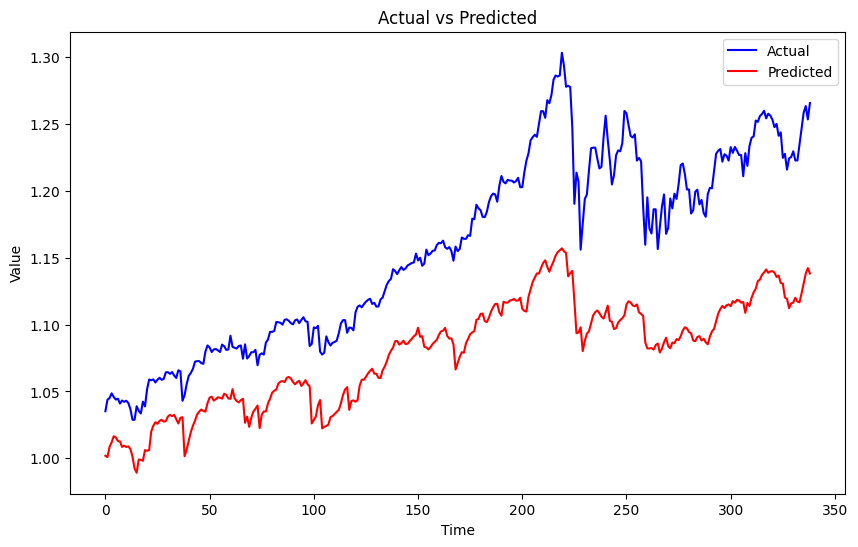

In [416]:
# Use best params to fit model
best_params = grid_result.best_params_
model = create_model(optimizer=best_params['optimizer'], 
                     dropout_rate=best_params['dropout_rate'], 
                     neurons=best_params['neurons'])
model.fit(X_train, y_train, epochs=50, batch_size=72, verbose=2)
test_loss = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
y_pred_test = model.predict(X_test)


plt.figure(figsize=(10,6))
plt.plot(y_test, color='blue', label='Actual')
plt.plot(y_pred_test, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [417]:
# MSE and RMSE for model
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_train = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print(f'Train MSE: {mse_train}, Train MAE: {mae_train}, Train RMSE: {rmse_train}')
print(f'Test MSE: {mse_test}, Test MAE: {mae_test}, Test RMSE: {rmse_test}')


225/225 [==============================] - 2s 10ms/step
Train MSE: 8.961048635048714e-05, Train MAE: 0.0074643901954900204, Train RMSE: 0.009466281548236727
Test MSE: 0.007194754157694019, Test MAE: 0.07776847239063195, Test RMSE: 0.08482189668767151


In [418]:
# Convert predicted prices to returns and check if it will guess the correct direction of the market
y_test_series = pd.Series(y_test.flatten())
predicted_series = pd.Series(model.predict(X_test).flatten())

actual_returns = y_test_series.pct_change()
predicted_returns = predicted_series.pct_change()

actual_sign = np.sign(actual_returns)
predicted_sign = np.sign(predicted_returns)

same_sign = (actual_sign == predicted_sign).astype(int)

print(same_sign)
accuracy = same_sign.mean()
print(f'Accuracy: {accuracy}')
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score((actual_sign == 1).astype(int), (predicted_sign == 1).astype(int))
print(f'ROC AUC: {roc_auc}')


11/11 [==============================] - 0s 10ms/step
0      0
1      0
2      1
3      1
4      0
      ..
334    1
335    1
336    1
337    0
338    0
Length: 339, dtype: int64
Accuracy: 0.45427728613569324
ROC AUC: 0.45365079365079364
